# 🏠  Задача предсказания стоимости квартиры в Москве и Московской области




На занятии мы будем работать с датасетом, в котором собраны данные о более чем 22 тыс. объектов жилой недвижимости в Москве и МО. Еще раз пройдемся по этапам разведочного анализа данных, обучим модель линейной регрессии, узнаем про удобный инструмент ```Pipeline``` и увидим, как можем влиять на качество модели.

# Этап I: EDA

**Важное напоминание**. Мы можем перебрать сотни комбинаций гиперпараметров, посчитать десятки метрик качества, вручную написать все функции — но какой в этом толк, если наш датасет не прошел EDA...

За счет работы с данными мы можем существенно повысить качество модели и достичь результата, которого мы не смогли бы достичь другими методами и приемами. Поэтому всегда начинаем с разведочного анализа данных.

На этом этапе в данных важно не механически посмотреть пропуски и ошибки, но максимально в них погрузиться, понять логику датасета. Если замечаем что-то необычное — попытаться понять, ошибка ли это, почему такое значение могло сюда попасть. Как и для каких целей датасет мог быть собран, нужно ли (не только с математической точки зрения, но и логически и с учетом вашей бизнес-задачи) как-либо преобразовывать датасет.

Будем задавать сегодня много вопросов и искать на них ответы.

In [ ]:
# Импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm

In [ ]:
# Загрузим датасет
df = pd.read_csv('https://raw.githubusercontent.com/arl20/python_2024_AI/refs/heads/main/datasets/flats.csv')

In [ ]:
# Посмотрим на первые пять строк
df.head()

,Price,Apartment type,Metro station,Minutes to metro,Region,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors,Renovation
0,6300000.0,Secondary,Опалиха,6.0,Moscow region,1.0,30.6,11.1,8.5,25.0,25,Cosmetic
1,9000000.0,Secondary,Павшино,2.0,Moscow region,1.0,49.2,20.0,10.0,6.0,15,European-style renovation
2,11090000.0,Secondary,Мякинино,14.0,Moscow region,1.0,44.7,16.2,13.1,10.0,25,Cosmetic
3,8300000.0,Secondary,Строгино,8.0,Moscow region,1.0,35.1,16.0,11.0,12.0,33,European-style renovation
4,6450000.0,Secondary,Опалиха,6.0,Moscow region,1.0,37.7,15.2,4.0,5.0,5,Without renovation


In [ ]:
# Индексы сейчас идут с нуля. Может быть удобнее воспринимать традиционно с 1
df.index = df.index + 1

In [ ]:
# Поменяем формат вывода чисел: разделим разряды запятой и будем выводить два знака после точки
pd.options.display.float_format = '{:,.2f}'.format

In [ ]:
df

,Price,Apartment type,Metro station,Minutes to metro,Region,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors,Renovation
1,"6,300,000.00",Secondary,Опалиха,6.00,Moscow region,1.00,30.60,11.10,8.50,25.00,25,Cosmetic
2,"9,000,000.00",Secondary,Павшино,2.00,Moscow region,1.00,49.20,20.00,10.00,6.00,15,European-style renovation
3,"11,090,000.00",Secondary,Мякинино,14.00,Moscow region,1.00,44.70,16.20,13.10,10.00,25,Cosmetic
4,"8,300,000.00",Secondary,Строгино,8.00,Moscow region,1.00,35.10,16.00,11.00,12.00,33,European-style renovation
5,"6,450,000.00",Secondary,Опалиха,6.00,Moscow region,1.00,37.70,15.20,4.00,5.00,5,Without renovation
...,...,...,...,...,...,...,...,...,...,...,...,...
22672,"4,768,792.00",New building,Котельники,8.00,Moscow region,0.00,31.75,13.00,5.00,4.00,17,Cosmetic
22673,"5,900,000.00",New building,Домодедовская,25.00,Moscow region,1.00,31.60,10.10,12.20,11.00,15,Cosmetic
22674,"3,700,000.00",New building,Котельники,30.00,Moscow region,0.00,18.00,15.00,8.10,17.00,17,Cosmetic
22675,"5,768,869.00",New building,Жулебино,14.00,Moscow region,2.00,36.39,22.00,6.60,12.00,14,Cosmetic


In [ ]:
# Этаж всегда будет целым числом, можем поправить отображение
df['Floor'] = df['Floor'].astype('int16')

In [ ]:
df

,Price,Apartment type,Metro station,Minutes to metro,Region,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors,Renovation
1,"6,300,000.00",Secondary,Опалиха,6.00,Moscow region,1.00,30.60,11.10,8.50,25,25,Cosmetic
2,"9,000,000.00",Secondary,Павшино,2.00,Moscow region,1.00,49.20,20.00,10.00,6,15,European-style renovation
3,"11,090,000.00",Secondary,Мякинино,14.00,Moscow region,1.00,44.70,16.20,13.10,10,25,Cosmetic
4,"8,300,000.00",Secondary,Строгино,8.00,Moscow region,1.00,35.10,16.00,11.00,12,33,European-style renovation
5,"6,450,000.00",Secondary,Опалиха,6.00,Moscow region,1.00,37.70,15.20,4.00,5,5,Without renovation
...,...,...,...,...,...,...,...,...,...,...,...,...
22672,"4,768,792.00",New building,Котельники,8.00,Moscow region,0.00,31.75,13.00,5.00,4,17,Cosmetic
22673,"5,900,000.00",New building,Домодедовская,25.00,Moscow region,1.00,31.60,10.10,12.20,11,15,Cosmetic
22674,"3,700,000.00",New building,Котельники,30.00,Moscow region,0.00,18.00,15.00,8.10,17,17,Cosmetic
22675,"5,768,869.00",New building,Жулебино,14.00,Moscow region,2.00,36.39,22.00,6.60,12,14,Cosmetic


In [ ]:
# Удостоверимся, что датасет включает объекты только нужных регионов
print(df['Region'].unique())
df['Region'].unique()

['Moscow region' 'Moscow']


array(['Moscow region', 'Moscow'], dtype=object)

In [ ]:
# Посмотрим информацию о датасете
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22676 entries, 1 to 22676
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             22676 non-null  float64
 1   Apartment type    22676 non-null  object 
 2   Metro station     22676 non-null  object 
 3   Minutes to metro  22676 non-null  float64
 4   Region            22676 non-null  object 
 5   Number of rooms   22676 non-null  float64
 6   Area              22676 non-null  float64
 7   Living area       22676 non-null  float64
 8   Kitchen area      22676 non-null  float64
 9   Floor             22676 non-null  int16  
 10  Number of floors  22676 non-null  int64  
 11  Renovation        22676 non-null  object 
dtypes: float64(6), int16(1), int64(1), object(4)
memory usage: 1.9+ MB


In [ ]:
# Характеристики для вещественнозначных столбцов
df.describe()

,Price,Minutes to metro,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors
count,"22,676.00","22,676.00","22,676.00","22,676.00","22,676.00","22,676.00","22,676.00","22,676.00"
mean,"36,121,321.82",11.89,2.04,71.97,38.52,12.59,9.19,16.56
std,"82,825,614.18",6.20,1.52,68.37,38.12,7.73,7.55,9.78
min,"1,150,000.00",0.00,0.00,6.00,2.00,1.00,1.00,1.00
25%,"7,068,116.00",7.00,1.00,37.40,17.60,8.60,4.00,11.00
50%,"11,343,200.00",11.00,2.00,53.30,28.50,10.60,8.00,16.00
75%,"24,799,247.50",15.00,3.00,77.14,43.20,14.50,13.00,20.00
max,"2,455,020,000.00",60.00,12.00,"1,117.00",566.80,122.00,92.00,97.00


In [ ]:
# Характеристики для категориальных столбцов
df.describe(include='object')

,Apartment type,Metro station,Region,Renovation
count,22676,22676,22676,22676
unique,2,547,2,4
top,Secondary,Красногвардейская,Moscow,Cosmetic
freq,13152,2697,16113,12788


**Вопрос:** должно ли нас что-то смутить в выведенных характеристиках?


In [ ]:
# Выведем объекты, у которых признак "Количество комнат" равен нулю.
df[df['Number of rooms'] == 0]

,Price,Apartment type,Metro station,Minutes to metro,Region,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors,Renovation
1328,"125,000,000.00",Secondary,Аэропорт,12.00,Moscow,0.00,135.30,70.50,17.80,37,37,Without renovation
1329,"119,000,000.00",Secondary,Белорусская,6.00,Moscow,0.00,277.00,142.20,29.60,4,6,Without renovation
1330,"42,000,000.00",Secondary,Белорусская,5.00,Moscow,0.00,91.00,48.10,14.20,5,6,Without renovation
1331,"24,500,000.00",Secondary,Ростокино,11.00,Moscow,0.00,100.00,75.00,20.00,8,38,Without renovation
1332,"16,300,000.00",Secondary,Народное Ополчение,19.00,Moscow,0.00,37.30,21.00,9.70,2,28,Without renovation
...,...,...,...,...,...,...,...,...,...,...,...,...
22660,"4,940,286.00",New building,Красногвардейская,11.00,Moscow region,0.00,27.35,12.80,4.50,12,20,Cosmetic
22665,"4,755,584.00",New building,Котельники,8.00,Moscow region,0.00,31.66,12.90,5.00,4,17,Cosmetic
22666,"4,755,584.00",New building,Котельники,8.00,Moscow region,0.00,31.66,12.90,5.00,4,17,Cosmetic
22672,"4,768,792.00",New building,Котельники,8.00,Moscow region,0.00,31.75,13.00,5.00,4,17,Cosmetic


**Вопрос:** 3731 объект с 0 комнат. Ошибочные ли это данные? 🤔



In [ ]:
print(f'Среднее значение стоимости квартиры в датасете - {df["Price"].mean():,.2f} рублей')
print(f'Медианное значение стоимости квартиры в датасете - {df["Price"].median():,.2f} рублей')

Среднее значение стоимости квартиры в датасете - 36,121,321.82 рублей
Медианное значение стоимости квартиры в датасете - 11,343,200.00 рублей


**Вопрос:** О чем говорит разница между средним и медианой?

### Фильтрация и сортировка

Для лучшего понимания данных полезно максимально "покрутить" их и проверить гипотезы о характеристиках, наложив различные фильтры.

**Вопрос:** какие гипотезы мы можем выдвинуть, что можем захотеть посмотреть прицельно и зачем?

In [ ]:
# Для удобства выведем имещиеся в датасете колонки
df.columns

Index(['Price', 'Apartment type', 'Metro station', 'Minutes to metro',
       'Region', 'Number of rooms', 'Area', 'Living area', 'Kitchen area',
       'Floor', 'Number of floors', 'Renovation'],
      dtype='object')

In [ ]:
# Уникальные значения категориальных признаков тоже полезно посмотреть
for col in df.select_dtypes(['object']).columns:
  print(f'{col}: {df[col].unique()[:10]}')

Apartment type: ['Secondary' 'New building']
Metro station: [' Опалиха' ' Павшино' ' Мякинино' ' Строгино' ' Нахабино'
 ' Красногорская' ' Тушинская' ' Аникеевка' ' Волоколамская' ' Пенягино']
Region: ['Moscow region' 'Moscow']
Renovation: ['Cosmetic' 'European-style renovation' 'Without renovation' 'Designer']


In [ ]:
# Посмотрим средние значения стоимости и количества комнат по Москве
df[df['Region'] == 'Moscow'][['Price', 'Number of rooms']].mean()

,0
Price,"47,983,477.58"
Number of rooms,2.22


In [ ]:
# Те же значения - не в Москве (в нашем случае - в Московской области, но если бы было больше регионов, именно так смотреть было бы удобнее)
df[df['Region'] != 'Moscow'][['Price', 'Number of rooms']].mean()

,0
Price,"6,998,220.22"
Number of rooms,1.60


In [ ]:
# Средняя цена квартир на вторичном рынке в Москве
df[(df['Region'] == 'Moscow') &
 (df['Apartment type'] == 'Secondary')][['Price', 'Number of rooms']].mean()

,0
Price,"58,738,445.12"
Number of rooms,2.38


In [ ]:
# Найдем квартиры с самой низкой стоимостью. Кстати, что можно сказать про первый выведенный объект?
df.sort_values(by = 'Price').head()

,Price,Apartment type,Metro station,Minutes to metro,Region,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors,Renovation
13028,"1,150,000.00",Secondary,Покровское,32.00,Moscow,0.00,6.00,5.20,7.10,2,18,Without renovation
12990,"1,420,000.00",Secondary,Кузьминки,18.00,Moscow,0.00,15.20,11.00,7.90,1,5,Without renovation
12864,"1,560,000.00",Secondary,Кузьминки,18.00,Moscow,0.00,12.00,9.00,7.60,1,5,Without renovation
12808,"1,750,000.00",Secondary,Университет,14.00,Moscow,0.00,14.80,12.00,7.90,1,9,Cosmetic
18020,"1,939,125.00",New building,Алма-Атинская,13.00,Moscow region,0.00,16.97,10.70,8.00,16,16,Cosmetic


In [ ]:
# Можем вывести его отдельно (обратите внимание на индексы)
df.iloc[13027]

,13028
Price,"1,150,000.00"
Apartment type,Secondary
Metro station,Покровское
Minutes to metro,32.00
Region,Moscow
Number of rooms,0.00
Area,6.00
Living area,5.20
Kitchen area,7.10
Floor,2


In [ ]:
# Посмотрим и на самые дорогие квартиры
df.sort_values(by='Price', ascending=False).head()

,Price,Apartment type,Metro station,Minutes to metro,Region,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors,Renovation
4091,"2,455,020,000.00",Secondary,Маяковская,1.00,Moscow,6.00,"1,067.40",541.80,95.00,9,9,Designer
12841,"1,732,170,825.00",Secondary,Охотный ряд,7.00,Moscow,0.00,719.00,300.00,50.00,5,5,Without renovation
9805,"1,517,997,000.00",Secondary,Парк культуры,8.00,Moscow,6.00,584.10,297.40,55.00,5,5,Designer
3898,"1,475,430,000.00",Secondary,Площадь Революции,0.00,Moscow,5.00,657.50,334.50,61.00,1,5,Designer
9678,"1,422,120,000.00",Secondary,Боровицкая,14.00,Moscow,5.00,508.00,225.00,25.00,4,4,Without renovation


In [ ]:
# Отсортируем объекты по цене и количеству комнат
df.sort_values(by=['Price', 'Number of rooms'], ascending=[True, False]).head()

,Price,Apartment type,Metro station,Minutes to metro,Region,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors,Renovation
13028,"1,150,000.00",Secondary,Покровское,32.00,Moscow,0.00,6.00,5.20,7.10,2,18,Without renovation
12990,"1,420,000.00",Secondary,Кузьминки,18.00,Moscow,0.00,15.20,11.00,7.90,1,5,Without renovation
12864,"1,560,000.00",Secondary,Кузьминки,18.00,Moscow,0.00,12.00,9.00,7.60,1,5,Without renovation
12808,"1,750,000.00",Secondary,Университет,14.00,Moscow,0.00,14.80,12.00,7.90,1,9,Cosmetic
17952,"1,939,125.00",New building,Алма-Атинская,13.00,Moscow region,0.00,16.97,10.70,8.00,14,16,Cosmetic


In [ ]:
# Проверим среднюю цену квартир в Москве с косметическим ремонтом или без ремонта
print(f'Средняя цена в Москве квартир с косметическим ремонтом или без ремонта: {df[(df["Region"] == "Moscow") & (df["Renovation"].isin(["Cosmetic", "Without renovation"]))]["Price"].mean():,.2f} рублей')

Средняя цена в Москве квартир с косметическим ремонтом или без ремонта: 31,246,510.60 рублей


In [ ]:
# Посмотрим среднее число комнат у квартир в Московской области, которые дороже 3 млн рублей
print(f'Среднее число комнат у квартир в МО дороже 3 млн руб.: {df[(df['Region'] == 'Moscow region') & (df['Price'] > 3000000)]['Number of rooms'].mean():,.2f}')

Среднее число комнат у квартир в МО дороже 3 млн руб.: 1.66


In [ ]:
# На сколько отличается площадь кухни в новостройках и вторичке?
square_nb = df[df['Apartment type'] == 'New building']['Kitchen area'].mean()
square_s = df[df['Apartment type'] == 'Secondary']['Kitchen area'].mean()
print(f'Разница в среднеей площади кухни в новостройках и на вторичном рынке: {square_nb - square_s}')

Разница в среднеей площади кухни в новостройках и на вторичном рынке: -2.776855716535305


### Создание новых столбцов

Как для визуалиации, так и для дальнейшей работы с моделью может быть полезно добавить новые признаки на основе вычислений по имеющимся

In [ ]:
# Создадим столбец, значения которого будут принимать 1, если стоимость квартиры выше медианной и 0 - иначе
df['is_expensive'] = np.where(df['Price'] > df['Price'].median(), 1, 0)

In [ ]:
df['is_expensive']

,is_expensive
1,0
2,0
3,0
4,0
5,0
...,...
22672,0
22673,0
22674,0
22675,0


In [ ]:
df[df['is_expensive'] == 1]

,Price,Apartment type,Metro station,Minutes to metro,Region,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors,Renovation,is_expensive
12,"12,300,000.00",Secondary,Волоколамская,16.00,Moscow region,1.00,39.00,21.90,9.90,26,30,Designer,1
13,"14,000,000.00",Secondary,Волоколамская,12.00,Moscow region,1.00,48.00,23.00,9.00,12,28,Designer,1
27,"14,000,000.00",Secondary,Мякинино,16.00,Moscow region,1.00,38.10,21.40,9.80,5,19,Designer,1
38,"11,680,000.00",Secondary,Пенягино,16.00,Moscow region,1.00,36.50,20.60,9.70,5,45,Designer,1
39,"11,900,000.00",Secondary,Павшино,2.00,Moscow region,1.00,28.00,18.00,7.00,12,31,Designer,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22642,"15,536,400.00",New building,Аннино,7.00,Moscow,2.00,85.00,45.10,13.70,5,22,Cosmetic,1
22643,"14,541,800.00",New building,Аннино,7.00,Moscow,2.00,79.90,42.50,13.30,6,22,Cosmetic,1
22644,"14,676,600.00",New building,Аннино,7.00,Moscow,2.00,80.20,42.70,13.30,8,22,Cosmetic,1
22645,"13,739,550.00",New building,Аннино,7.00,Moscow,2.00,75.70,40.40,12.90,5,22,Cosmetic,1


In [ ]:
# Альтернативным способом создадим столбец, значения которого будут принимать 1, если в квартире больше трех комнат и больше 80 квадратных метров и 0 - иначе
df['is_big'] = df.apply(lambda row: 1 if row['Number of rooms'] >= 3 and row['Area'] >= 80 else 0, axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22676 entries, 1 to 22676
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             22676 non-null  float64
 1   Apartment type    22676 non-null  object 
 2   Metro station     22676 non-null  object 
 3   Minutes to metro  22676 non-null  float64
 4   Region            22676 non-null  object 
 5   Number of rooms   22676 non-null  float64
 6   Area              22676 non-null  float64
 7   Living area       22676 non-null  float64
 8   Kitchen area      22676 non-null  float64
 9   Floor             22676 non-null  int16  
 10  Number of floors  22676 non-null  int64  
 11  Renovation        22676 non-null  object 
 12  is_expensive      22676 non-null  int64  
 13  is_big            22676 non-null  int64  
dtypes: float64(6), int16(1), int64(3), object(4)
memory usage: 2.3+ MB


In [ ]:
df.sample(10)

,Price,Apartment type,Metro station,Minutes to metro,Region,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors,Renovation,is_expensive,is_big
1326,"18,285,998.00",Secondary,Строгино,19.00,Moscow region,3.00,76.06,40.50,16.90,8,24,European-style renovation,1,0
6523,"13,500,000.00",Secondary,ВДНХ,11.00,Moscow,2.00,40.00,22.00,7.50,4,12,Cosmetic,1,0
10092,"125,000,000.00",Secondary,Терехово,44.00,Moscow,5.00,322.00,138.00,45.00,2,4,Designer,1,1
16686,"5,736,000.00",New building,Депо,19.00,Moscow,0.00,28.68,16.60,9.00,2,11,Cosmetic,0,0
6031,"35,500,000.00",Secondary,Динамо,9.00,Moscow,2.00,66.10,24.80,19.60,11,19,Without renovation,1,0
2081,"170,000,000.00",Secondary,Кропоткинская,10.00,Moscow,3.00,117.00,51.00,6.00,3,5,European-style renovation,1,1
1315,"13,500,000.00",Secondary,Опалиха,6.00,Moscow region,3.00,62.50,40.00,6.00,23,27,Cosmetic,1,0
4770,"14,870,000.00",Secondary,Калитники,17.00,Moscow,1.00,49.00,25.00,12.70,5,24,European-style renovation,1,0
1332,"16,300,000.00",Secondary,Народное Ополчение,19.00,Moscow,0.00,37.30,21.00,9.70,2,28,Without renovation,1,0
15509,"3,962,996.00",New building,Жулебино,13.00,Moscow region,0.00,23.89,15.50,8.60,9,14,Cosmetic,0,0


In [ ]:
# Нам может быть недостаточно такой градации и мы можем захотеть побить на большее количество категорий:

def size_range(row):
  if row['Number of rooms'] >= 3 and row['Area'] >= 80:
    return 2
  elif row['Area'] >= 50:
    return 1
  return 0

df['size_range'] = df.apply(size_range, axis=1)

In [ ]:
df.sample(10)

,Price,Apartment type,Metro station,Minutes to metro,Region,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors,Renovation,is_expensive,is_big,size_range
4391,"17,500,000.00",Secondary,Минская,36.00,Moscow,1.00,56.10,21.40,13.60,14,25,European-style renovation,1,0,1
12368,"7,000,000.00",Secondary,Прокшино,18.00,Moscow,0.00,21.10,12.80,8.40,8,16,Cosmetic,0,0,0
17619,"4,580,230.00",New building,Жулебино,14.00,Moscow region,0.00,21.87,10.50,4.20,17,14,Cosmetic,0,0,0
9424,"22,700,000.00",Secondary,Беговая,6.00,Moscow,3.00,74.60,49.00,9.00,7,17,European-style renovation,1,0,1
4824,"24,450,000.00",Secondary,Хорошево,22.00,Moscow,1.00,40.60,15.30,11.60,6,30,Designer,1,0,0
8965,"19,500,000.00",Secondary,Коммунарка,19.00,Moscow,3.00,87.00,50.50,14.00,10,17,Cosmetic,1,1,2
591,"176,400,000.00",Secondary,Баррикадная,16.00,Moscow,4.00,195.20,20.00,22.80,5,5,European-style renovation,1,1,2
9562,"75,000,000.00",Secondary,Проспект Мира,12.00,Moscow,4.00,154.40,95.00,15.10,9,10,Cosmetic,1,1,2
8583,"24,500,000.00",Secondary,Народное Ополчение,12.00,Moscow,3.00,75.00,55.00,9.00,4,17,European-style renovation,1,0,1
13919,"7,634,088.00",New building,Красногвардейская,5.00,Moscow region,2.00,59.40,32.20,8.00,16,20,Cosmetic,0,0,1


In [ ]:
# Создадим столбец is_near_metro, который принимает значение 1, если метро находится не более чем в 5 минутах, и 0 - иначе.
df['is_near_metro'] = np.where(df['Minutes to metro'] <= 5, 1, 0)

In [ ]:
df['Minutes to metro'] <= 5

,Minutes to metro
1,False
2,True
3,False
4,False
5,False
...,...
22672,False
22673,False
22674,False
22675,False


In [ ]:
# Выведем первые пять объектов с наименьшей стоимостю и площадью
df.nsmallest(n=5,
             columns=['Price', 'Area'],
             keep='first')

,Price,Apartment type,Metro station,Minutes to metro,Region,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors,Renovation,is_expensive,is_big,size_range,is_near_metro
13028,"1,150,000.00",Secondary,Покровское,32.00,Moscow,0.00,6.00,5.20,7.10,2,18,Without renovation,0,0,0,0
12990,"1,420,000.00",Secondary,Кузьминки,18.00,Moscow,0.00,15.20,11.00,7.90,1,5,Without renovation,0,0,0,0
12864,"1,560,000.00",Secondary,Кузьминки,18.00,Moscow,0.00,12.00,9.00,7.60,1,5,Without renovation,0,0,0,0
12808,"1,750,000.00",Secondary,Университет,14.00,Moscow,0.00,14.80,12.00,7.90,1,9,Cosmetic,0,0,0,0
17952,"1,939,125.00",New building,Алма-Атинская,13.00,Moscow region,0.00,16.97,10.70,8.00,14,16,Cosmetic,0,0,0,0


In [ ]:
# И первые пять объектов с наибольшей стоимостю и площадью

df.nlargest(n=5,
             columns=['Price', 'Area'],
             keep='first')

,Price,Apartment type,Metro station,Minutes to metro,Region,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors,Renovation,is_expensive,is_big,size_range,is_near_metro
4091,"2,455,020,000.00",Secondary,Маяковская,1.00,Moscow,6.00,"1,067.40",541.80,95.00,9,9,Designer,1,1,2,1
12841,"1,732,170,825.00",Secondary,Охотный ряд,7.00,Moscow,0.00,719.00,300.00,50.00,5,5,Without renovation,1,0,1,0
9805,"1,517,997,000.00",Secondary,Парк культуры,8.00,Moscow,6.00,584.10,297.40,55.00,5,5,Designer,1,1,2,0
3898,"1,475,430,000.00",Secondary,Площадь Революции,0.00,Moscow,5.00,657.50,334.50,61.00,1,5,Designer,1,1,2,1
9678,"1,422,120,000.00",Secondary,Боровицкая,14.00,Moscow,5.00,508.00,225.00,25.00,4,4,Without renovation,1,1,2,0


### Группировка

Группировка - один из важнейших инструментов EDA, который позволяет:

- Анализировать данные по категориям

- Сравнивать средние значения, суммы и другие статистики между группами

- Обнаруживать аномалии и выбросы в отдельных категориях

- Сокращать объем кода (не писать много фильтров вручную)

- Строить агрегированные отчеты одним вызовом метода

Сделаем несколько вариантов группировок

In [ ]:
df.groupby(['Apartment type'])[['Price']].mean()

,Price
Apartment type,
New building,"8,170,584.28"
Secondary,"56,361,804.20"


In [ ]:
grouped_df = df.groupby(['Apartment type', 'Region'], as_index=False)[['Price']].mean()

In [ ]:
grouped_df

,Apartment type,Region,Price
0,New building,Moscow,"10,774,207.09"
1,New building,Moscow region,"6,579,163.33"
2,Secondary,Moscow,"58,738,445.12"
3,Secondary,Moscow region,"10,797,369.37"


In [ ]:
grouped_df = df.groupby(['Apartment type', 'Region'], as_index=False)[['Price']].median()

In [ ]:
grouped_df

,Apartment type,Region,Price
0,New building,Moscow,"10,369,880.00"
1,New building,Moscow region,"6,277,691.00"
2,Secondary,Moscow,"21,500,000.00"
3,Secondary,Moscow region,"10,300,000.00"


**Вопрос**: что можно сказать о двух таблицах выше? В чем разница и о чем это может говорить?

In [ ]:
df.groupby(['size_range'])['Apartment type'].count()

,Apartment type
size_range,
0,10423
1,7360
2,4893


**Вопрос**: Есть дисбаланс классов. Откуда он взялся и о чем он может нам сказать?

In [ ]:
# Саггрегируем среднюю и медианную цены по квартирам трех категорий площади
df.groupby(['size_range']).agg(
    count=('size_range', 'count'),
    price_mean=('Price', 'mean'),
    price_median=('Price', 'median')
)

,count,price_mean,price_median
size_range,,,
0,10423,"8,717,405.31","7,343,106.00"
1,7360,"20,739,363.07","12,905,754.00"
2,4893,"117,634,143.83","69,000,000.00"


Можно посмотреть еще детальнее на средние значения

In [ ]:
def harmonic_mean(col):
  return len(col) / sum(1/col)

In [ ]:
df.groupby(['Region', 'Apartment type'], as_index=False).agg(
    count=('Region', 'count'),
    price_mean = ('Price', 'mean'),
    price_median = ('Price', 'median'),
    area_mean = ('Area', 'mean'),
    area_median = ('Area', 'median'),
    kitchen_area_mean = ('Kitchen area', 'mean'),
    kitchen_area_median = ('Kitchen area', 'median'),
    mean_minutes_to_metro = ('Minutes to metro', 'mean'),
    harmonic_mean = ('Price', harmonic_mean)
)

,Region,Apartment type,count,price_mean,price_median,area_mean,area_median,kitchen_area_mean,kitchen_area_median,mean_minutes_to_metro,harmonic_mean
0,Moscow,New building,3613,"10,774,207.09","10,369,880.00",54.38,54.70,12.43,11.80,13.68,"9,653,077.46"
1,Moscow,Secondary,12500,"58,738,445.12","21,500,000.00",89.88,62.00,13.93,10.90,12.21,"15,677,680.64"
2,Moscow region,New building,5911,"6,579,163.33","6,277,691.00",47.50,44.44,10.10,10.10,10.31,"5,879,616.07"
3,Moscow region,Secondary,652,"10,797,369.37","10,300,000.00",47.80,43.50,10.47,10.10,10.22,"9,685,040.43"


In [ ]:
table_pivot = pd.pivot_table(df,
               values=['Price', 'Area', 'Kitchen area', 'Minutes to metro'],
               columns=['Region', 'Apartment type'],
               aggfunc=['mean', 'median'])

In [ ]:
table_pivot

mean                                            \
Region                  Moscow               Moscow region                 
Apartment type    New building     Secondary  New building     Secondary   
Area                     54.38         89.88         47.50         47.80   
Kitchen area             12.43         13.93         10.10         10.47   
Minutes to metro         13.68         12.21         10.31         10.22   
Price            10,774,207.09 58,738,445.12  6,579,163.33 10,797,369.37   

                        median                                            
Region                  Moscow               Moscow region                
Apartment type    New building     Secondary  New building     Secondary  
Area                     54.70         62.00         44.44         43.50  
Kitchen area             11.80         10.90         10.10         10.10  
Minutes to metro         13.00         11.00         11.00          7.00  
Price            10,369,880.00 21,500,000.00  6,277,691.00 10,300,000.00

In [ ]:
table_pivot.columns

MultiIndex([(  'mean',        'Moscow', 'New building'),
            (  'mean',        'Moscow',    'Secondary'),
            (  'mean', 'Moscow region', 'New building'),
            (  'mean', 'Moscow region',    'Secondary'),
            ('median',        'Moscow', 'New building'),
            ('median',        'Moscow',    'Secondary'),
            ('median', 'Moscow region', 'New building'),
            ('median', 'Moscow region',    'Secondary')],
           names=[None, 'Region', 'Apartment type'])

In [ ]:
table_pivot.columns = ['_'.join(names) for names in table_pivot.columns]

In [ ]:
table_pivot.head()

,mean_Moscow_New building,mean_Moscow_Secondary,mean_Moscow region_New building,mean_Moscow region_Secondary,median_Moscow_New building,median_Moscow_Secondary,median_Moscow region_New building,median_Moscow region_Secondary
Area,54.38,89.88,47.50,47.80,54.70,62.00,44.44,43.50
Kitchen area,12.43,13.93,10.10,10.47,11.80,10.90,10.10,10.10
Minutes to metro,13.68,12.21,10.31,10.22,13.00,11.00,11.00,7.00
Price,"10,774,207.09","58,738,445.12","6,579,163.33","10,797,369.37","10,369,880.00","21,500,000.00","6,277,691.00","10,300,000.00"


In [ ]:
table_pivot = pd.pivot_table(df,
               values=['Price', 'Area', 'Kitchen area', 'Minutes to metro'],
               index=['Region', 'Apartment type'],
               aggfunc=['mean', 'median'])
table_pivot

mean                                \
                              Area Kitchen area Minutes to metro   
Region        Apartment type                                       
Moscow        New building   54.38        12.43            13.68   
              Secondary      89.88        13.93            12.21   
Moscow region New building   47.50        10.10            10.31   
              Secondary      47.80        10.47            10.22   

                                           median               \
                                     Price   Area Kitchen area   
Region        Apartment type                                     
Moscow        New building   10,774,207.09  54.70        11.80   
              Secondary      58,738,445.12  62.00        10.90   
Moscow region New building    6,579,163.33  44.44        10.10   
              Secondary      10,797,369.37  43.50        10.10   

                                                             
                             Minutes to metro         Price  
Region        Apartment type                                 
Moscow        New building              13.00 10,369,880.00  
              Secondary                 11.00 21,500,000.00  
Moscow region New building              11.00  6,277,691.00  
              Secondary                  7.00 10,300,000.00

Посчитаем для каждой квартиры столбец price_diff: разница в процентах от медианной цены квартиры в данном районе (район определяется по станции метро)

In [ ]:
df['Price_metro_median'] = df.groupby('Metro station')['Price'].transform('median')

In [ ]:
df['price_diff'] = 100 * (df['Price'] - df['Price_metro_median']) / df['Price_metro_median']

In [ ]:
df['price_diff_2']  = df.groupby('Metro station')['Price'].transform(lambda x: 100 * (x - x.median()) / x.median())

In [ ]:
df[['Price', 'Price_metro_median', 'price_diff', 'price_diff_2']]

,Price,Price_metro_median,price_diff,price_diff_2
1,"6,300,000.00","10,867,716.00",-42.03,-42.03
2,"9,000,000.00","8,143,483.00",10.52,10.52
3,"11,090,000.00","11,050,001.00",0.36,0.36
4,"8,300,000.00","15,175,372.50",-45.31,-45.31
5,"6,450,000.00","10,867,716.00",-40.65,-40.65
...,...,...,...,...
22672,"4,768,792.00","6,539,520.00",-27.08,-27.08
22673,"5,900,000.00","8,084,199.50",-27.02,-27.02
22674,"3,700,000.00","6,539,520.00",-43.42,-43.42
22675,"5,768,869.00","5,768,869.00",0.00,0.00


### Визуализация

In [ ]:
# Загрузим датасет повторно - сбросим сделанные ранее изменения
df = pd.read_csv('https://raw.githubusercontent.com/arl20/python_2024_AI/refs/heads/main/datasets/flats.csv')

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

In [ ]:
df['Number of rooms'] = df['Number of rooms'].astype(int)
df['Floor'] = df['Floor'].astype(int)
df['Number of floors'] = df['Number of floors'].astype(int)

0it [00:00, ?it/s]

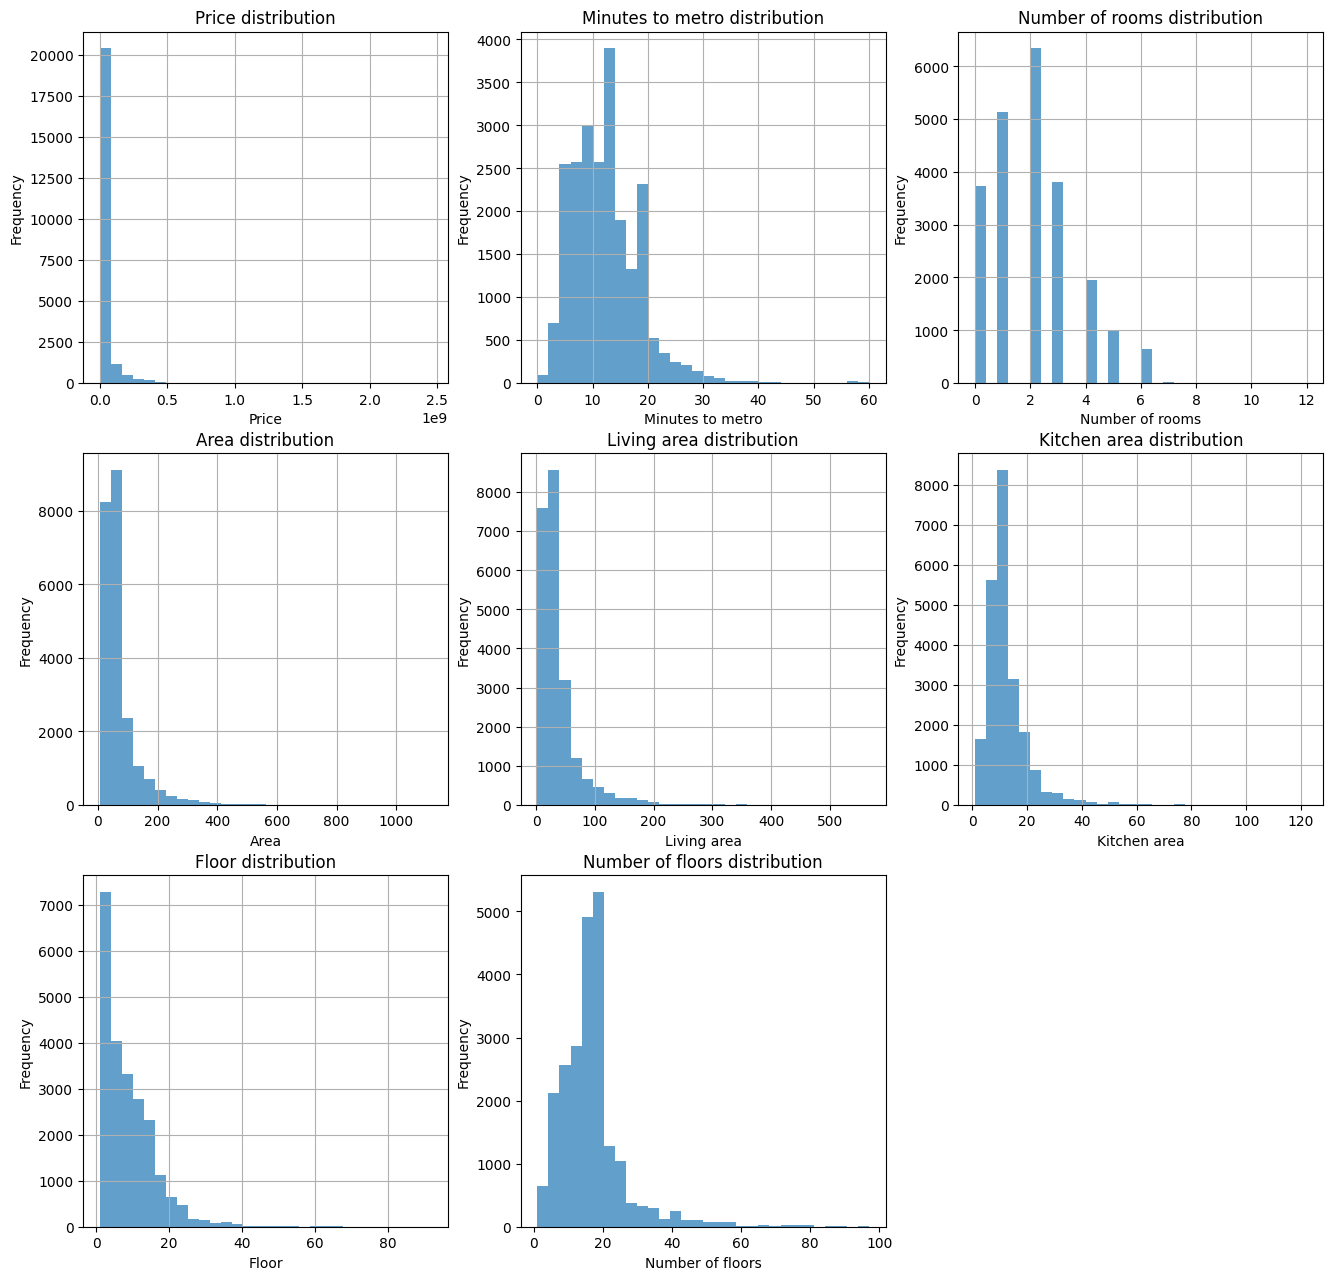

In [ ]:
# Построим графики по вещественнознчным признакам

numeric_cols = df.select_dtypes([int, float]).columns
num_cols = len(numeric_cols)
fig, axes = plt.subplots(nrows=(num_cols // 3) + (num_cols % 3), ncols=3, figsize=(16, (num_cols // 3 + 1) * 7))
for ax, col in tqdm(zip(axes.flatten(), numeric_cols)):
    ax.hist(df[col], bins=30, alpha=0.7)
    ax.set_title(f'{col} distribution')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.grid()

for i in range(num_cols, len(axes.flatten())):
    fig.delaxes(axes.flatten()[i])

plt.grid()
plt.show()

Scatterplot (диаграммы рассеяния)

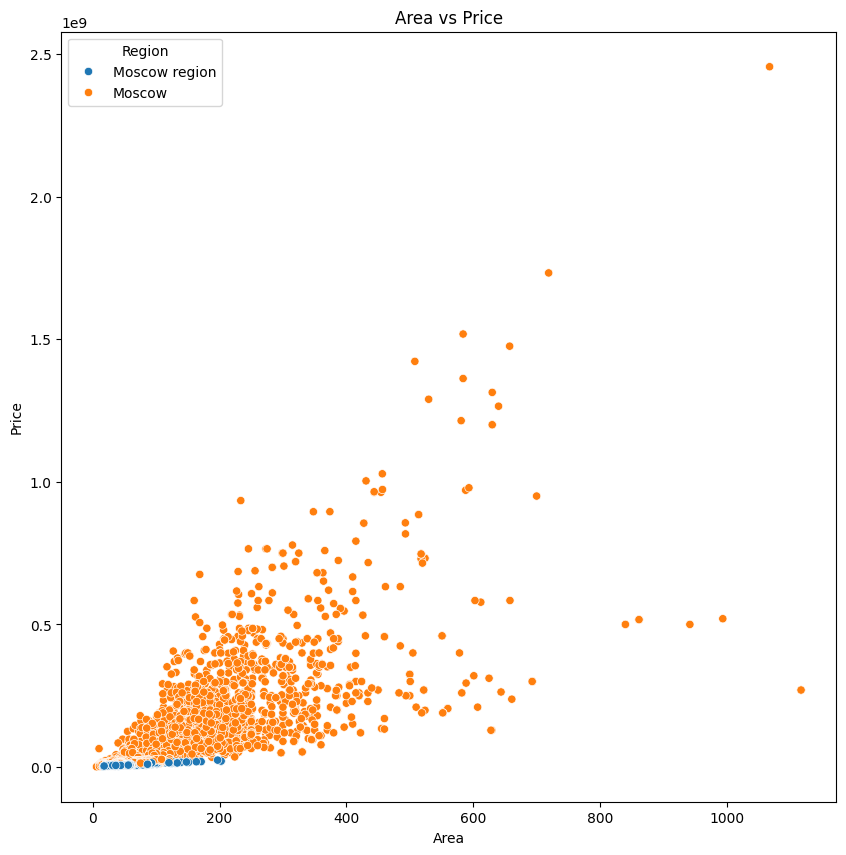

In [ ]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=df, x='Area', y='Price', hue='Region')
plt.title('Area vs Price')
plt.show()

**Вопрос** О чем говорит диаграмма выше? Как это может повлиять на качество модели?

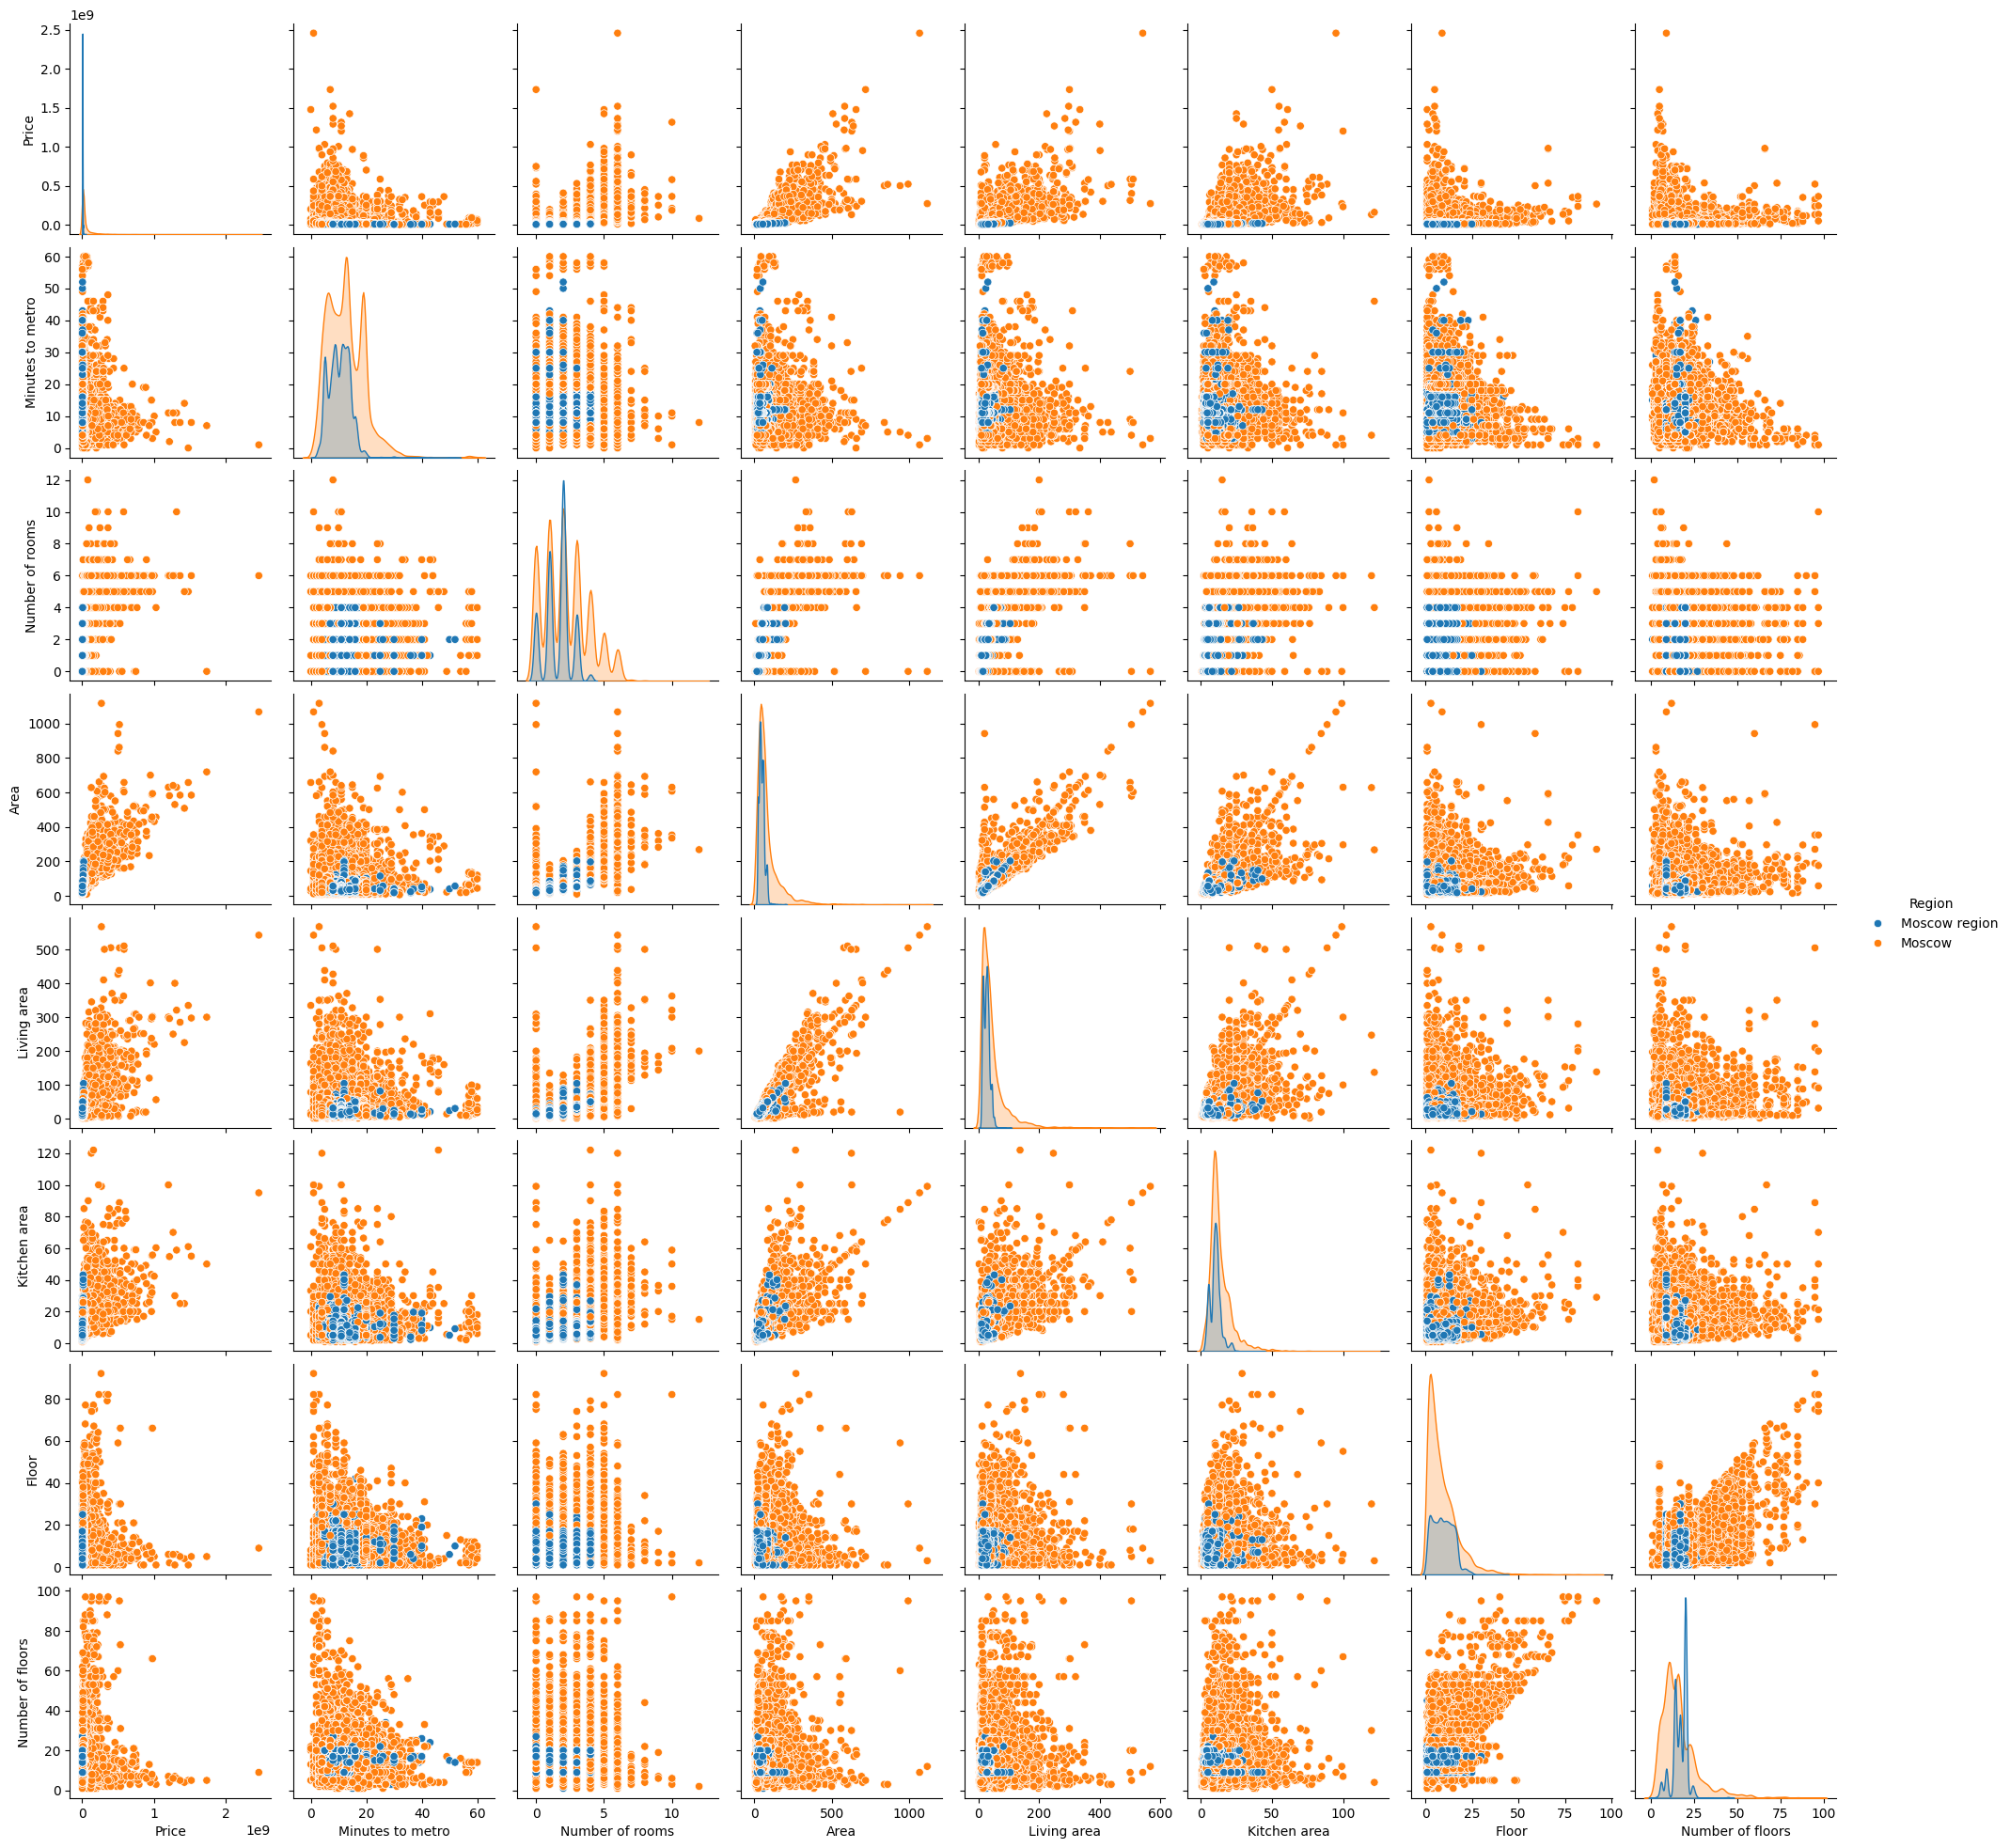

In [ ]:
sns.pairplot(df, hue='Region')

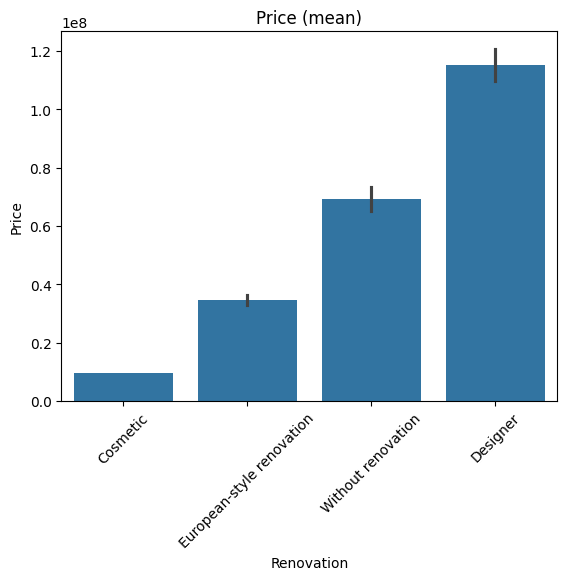

In [ ]:
sns.barplot(df, x='Renovation', y='Price')
plt.xticks(rotation=45)
plt.title('Price (mean)')
plt.show()

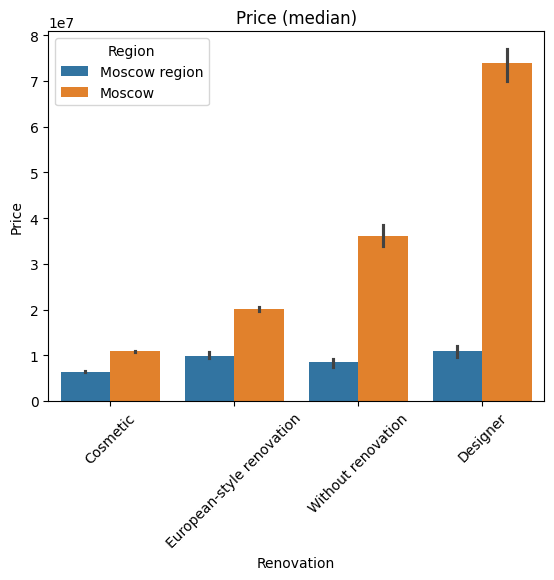

In [ ]:
sns.barplot(df, x='Renovation', y='Price', hue='Region', estimator=np.median)
plt.xticks(rotation=45)
plt.title('Price (median)')
plt.show()

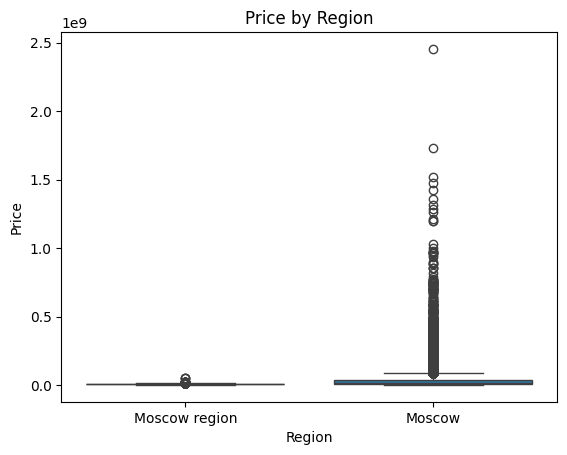

In [ ]:
sns.boxplot(df, y='Price', x='Region')
plt.title('Price by Region')
plt.show()

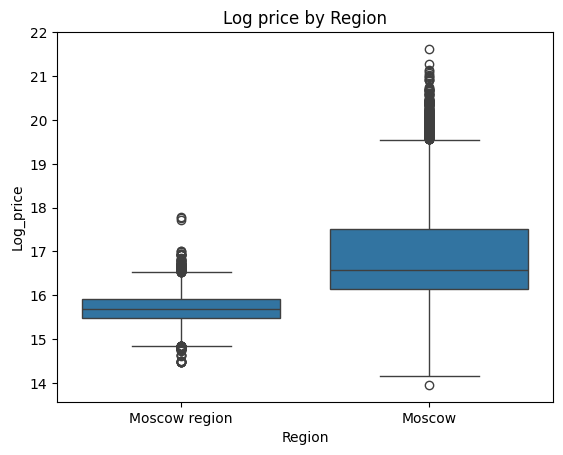

In [ ]:
df['Log_price'] = np.log(df['Price'])
sns.boxplot(df, y='Log_price', x='Region')
plt.title('Log price by Region')
plt.show()
df = df.drop(['Log_price'], axis=1)


### Корреляция

Посмотрим корреляции с числовыми переменными. Для этого используем коэффициент корреляции Пирсона.

<center><b>Correlation is not Causation!</b></center>

In [ ]:
df.corr(numeric_only=True)

,Price,Minutes to metro,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors
Price,1.00,-0.11,0.49,0.79,0.71,0.58,0.02,-0.02
Minutes to metro,-0.11,1.00,-0.08,-0.09,-0.09,-0.06,0.02,-0.03
Number of rooms,0.49,-0.08,1.00,0.69,0.66,0.48,0.09,0.07
Area,0.79,-0.09,0.69,1.00,0.91,0.73,0.08,0.04
Living area,0.71,-0.09,0.66,0.91,1.00,0.61,0.07,0.04
Kitchen area,0.58,-0.06,0.48,0.73,0.61,1.00,0.13,0.11
Floor,0.02,0.02,0.09,0.08,0.07,0.13,1.00,0.60
Number of floors,-0.02,-0.03,0.07,0.04,0.04,0.11,0.60,1.00


<Axes: >

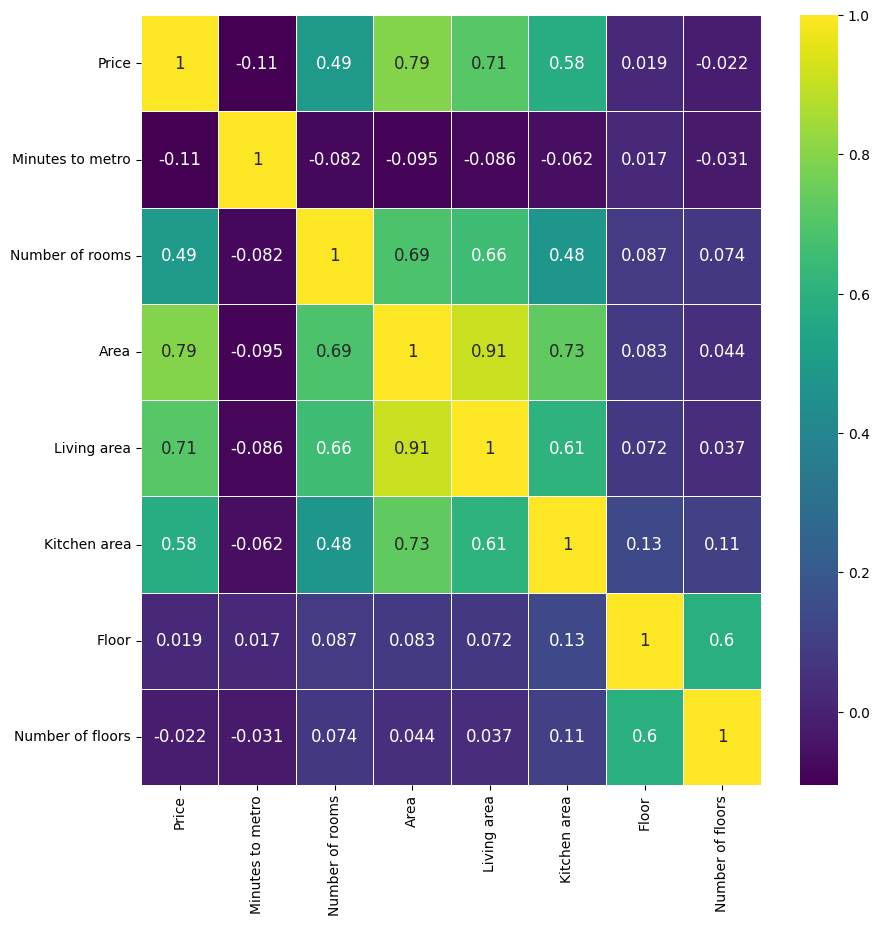

In [ ]:
fig , ax = plt.subplots(figsize = (10,10))

sns.heatmap(df.corr(numeric_only=True),
            linewidths=0.5, annot=True,cmap='viridis',
            linecolor="white", annot_kws = {'size':12})

**Вопрос**: Проанализируйте корреляции. Что можно сказать о данных на основе визуализации выше?

# Этап II: построение регрессии


Строим линейную регрессию (предполагаем, что цена линейно зависит от других факторов):

$$ price = w_0 + w_1*area + w_2*minutes\_to\_metro + w_3*Floor + ...$$

Во время обучения подбираются веса $w_0$, $w_1$.... Подбор весов происходит за счёт минимизации разности между реальными значениями и предсказанными.

___

In [ ]:
# импортируем библиотеки
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

## Обучение модели

In [ ]:
# отделяем числовые признаки и выделяем целевую переменную
df_1 = df.select_dtypes([int, float])
X = df_1.drop('Price', axis=1)
y = df_1['Price']

In [ ]:
# разбиваем на обучающую и тестовую выборки
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
# обучаем линейную регрессию
lr = LinearRegression()
lr.fit(train_x, train_y)

LinearRegression()

In [ ]:
lr.coef_

array([ -413476.30909123, -5412522.73928788,  1051040.00267419,
         -14443.09998545,   152718.73068895,  -252581.19452574,
        -410190.85017626])

In [ ]:
train_x.columns

Index(['Minutes to metro', 'Number of rooms', 'Area', 'Living area',
       'Kitchen area', 'Floor', 'Number of floors'],
      dtype='object')

In [ ]:
lr.intercept_

np.float64(-15751067.077486694)

In [ ]:
# предсказываем значения целевой переменной для обучающей выборки и выводим корень из средневадратичной ошибки
pred_train = lr.predict(train_x)
root_mean_squared_error(train_y, pred_train)

49905933.21178746

**Вопрос** Мы получили значение ошибки. Модель хорошая?

In [ ]:
#RMSE на тестовых данных
pred_test = lr.predict(test_x)
root_mean_squared_error(test_y, pred_test)

48886128.93104652

Вспомним, на каких данных мы обучались

In [ ]:
X.head()

,Minutes to metro,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors
0,6.00,1,30.60,11.10,8.50,25,25
1,2.00,1,49.20,20.00,10.00,6,15
2,14.00,1,44.70,16.20,13.10,10,25
3,8.00,1,35.10,16.00,11.00,12,33
4,6.00,1,37.70,15.20,4.00,5,5


Чтобы ответить на вопрос о качестве модели посмотрим на целевую переменную

In [ ]:
y

,Price
0,"6,300,000.00"
1,"9,000,000.00"
2,"11,090,000.00"
3,"8,300,000.00"
4,"6,450,000.00"
...,...
22671,"4,768,792.00"
22672,"5,900,000.00"
22673,"3,700,000.00"
22674,"5,768,869.00"


In [ ]:
print(f'RMSE: {round(root_mean_squared_error(test_y, pred_test), 5)}')
print(f'MAE: {round(mean_absolute_error(test_y, pred_test), 5)}')
print(f'R2: {round(r2_score(test_y, pred_test), 5)}')

RMSE: 48886128.93105
MAE: 21170186.77753
R2: 0.63275


**Вопрос** что сейчас можно сказать о модели?

## Стандартизация

In [ ]:
scaler = StandardScaler()
scaler.fit(train_x)
train_x_scaler = scaler.transform(train_x)
test_x_scaler = scaler.transform(test_x)

lr2 = LinearRegression()
lr2.fit(train_x_scaler, train_y)
pred2 = lr2.predict(test_x_scaler)
print(f'RMSE после стандартизации: {round(root_mean_squared_error(test_y, pred2), 5)}')
print(f'MAE после стандартизации: {round(mean_absolute_error(test_y, pred2), 5)}')
print(f'R2 после стандартизации: {round(r2_score(test_y, pred2), 5)}')

RMSE после стандартизации: 48886128.93105
MAE после стандартизации: 21170186.77753
R2 после стандартизации: 0.63275


## Обработка выбросов

In [ ]:
def remove_outliers(data, y, col, is_target = False):
    column = data[col] if not is_target else y
    IQR = column.quantile(0.75) - column.quantile(0.25)
    h = column.quantile(0.75) + 1.5 * IQR
    l = column.quantile(0.25) - 1.5 * IQR
    return data[column.between(l, h)], y[column.between(l, h)]

In [ ]:
train_x.shape

(17007, 7)

In [ ]:
train_x, train_y = remove_outliers(train_x, train_y, 'Price', is_target=True)
train_x, train_y = remove_outliers(train_x, train_y, 'Area')

In [ ]:
train_x.shape

(14061, 7)

In [ ]:
lr3 = LinearRegression()
lr3.fit(train_x, train_y)
pred3 = lr3.predict(test_x)
print(f'RMSE после обработки выбросов: {round(root_mean_squared_error(test_y, pred3), 5)}')
print(f'MAE после обработки выбросов: {round(mean_absolute_error(test_y, pred3), 5)}')
print(f'R2 после обработки выбросов: {round(r2_score(test_y, pred3), 5)}')

RMSE после обработки выбросов: 69576923.06786
MAE после обработки выбросов: 21569353.027
R2 после обработки выбросов: 0.25609


## Кодирование категориальных признаков

Мы будем подробно проходить кодирование категориальных признаков на следующем занятии, но сейчас просто заметим влияние их обработки на результат

Для кодирования основной части категориальных признаков используем самый базовый метод - One-Hot Encoding

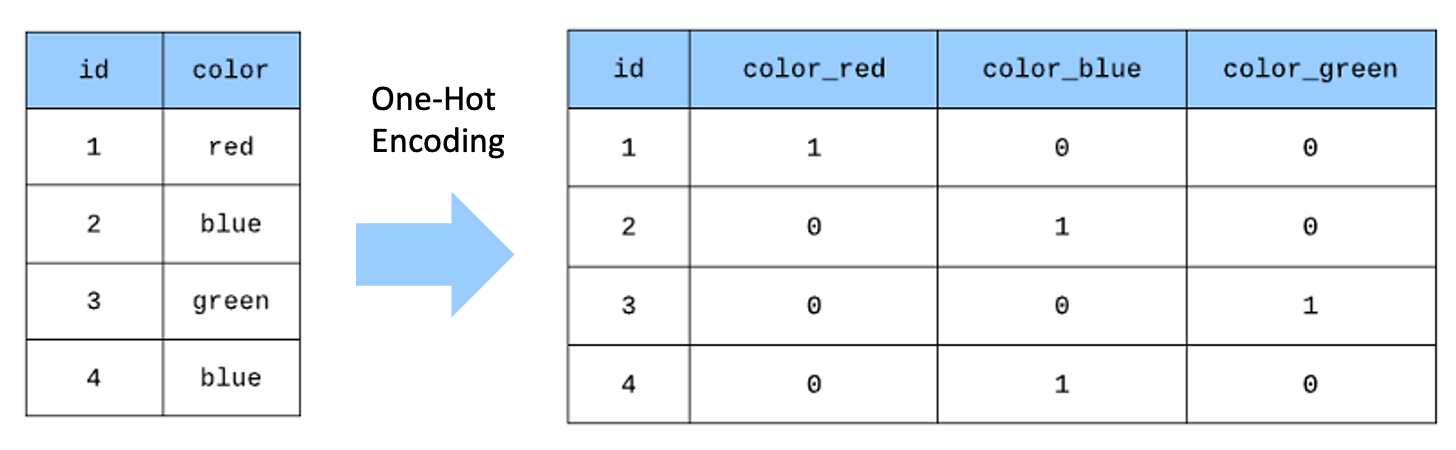

При использовании этого метода каждая категория в признаке принимает значение 1 или 0 (или True или False, как в коде ниже)

Соберем категориальные признаки и закодируем их при помощи функции ```pd.get_dummies()``` из библиотеки pandas





In [ ]:
df_with_cat = pd.get_dummies(df, columns =['Apartment type', 'Region', 'Renovation'])

In [ ]:
# Проверим количество уникальных категорий в столбце 'Metro station'
df['Metro station'].nunique()

547

**Вопрос**: Видим 547 уникальных значений. Хорошая ли идея была бы закодировать их тем же способом?

In [ ]:
# Посмотрим на обновленный датасет
df_with_cat.head()

,Price,Metro station,Minutes to metro,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors,Apartment type_New building,Apartment type_Secondary,Region_Moscow,Region_Moscow region,Renovation_Cosmetic,Renovation_Designer,Renovation_European-style renovation,Renovation_Without renovation
0,"6,300,000.00",Опалиха,6.00,1,30.60,11.10,8.50,25,25,False,True,False,True,True,False,False,False
1,"9,000,000.00",Павшино,2.00,1,49.20,20.00,10.00,6,15,False,True,False,True,False,False,True,False
2,"11,090,000.00",Мякинино,14.00,1,44.70,16.20,13.10,10,25,False,True,False,True,True,False,False,False
3,"8,300,000.00",Строгино,8.00,1,35.10,16.00,11.00,12,33,False,True,False,True,False,False,True,False
4,"6,450,000.00",Опалиха,6.00,1,37.70,15.20,4.00,5,5,False,True,False,True,False,False,False,True


In [ ]:
# Выдлелим в нем целевую переменную и разделим остальную выборку на обучающую и тестовую
df_4 = df_with_cat.copy()
X = df_4.drop('Price', axis=1)
y = df_4['Price']
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.25, random_state=42)

Вернемся к столбцу 'Metro station' и закодируем его с помощью другого способа - Mean Encoding. Он заменяет каждую категорию на среднее значение целевой переменной


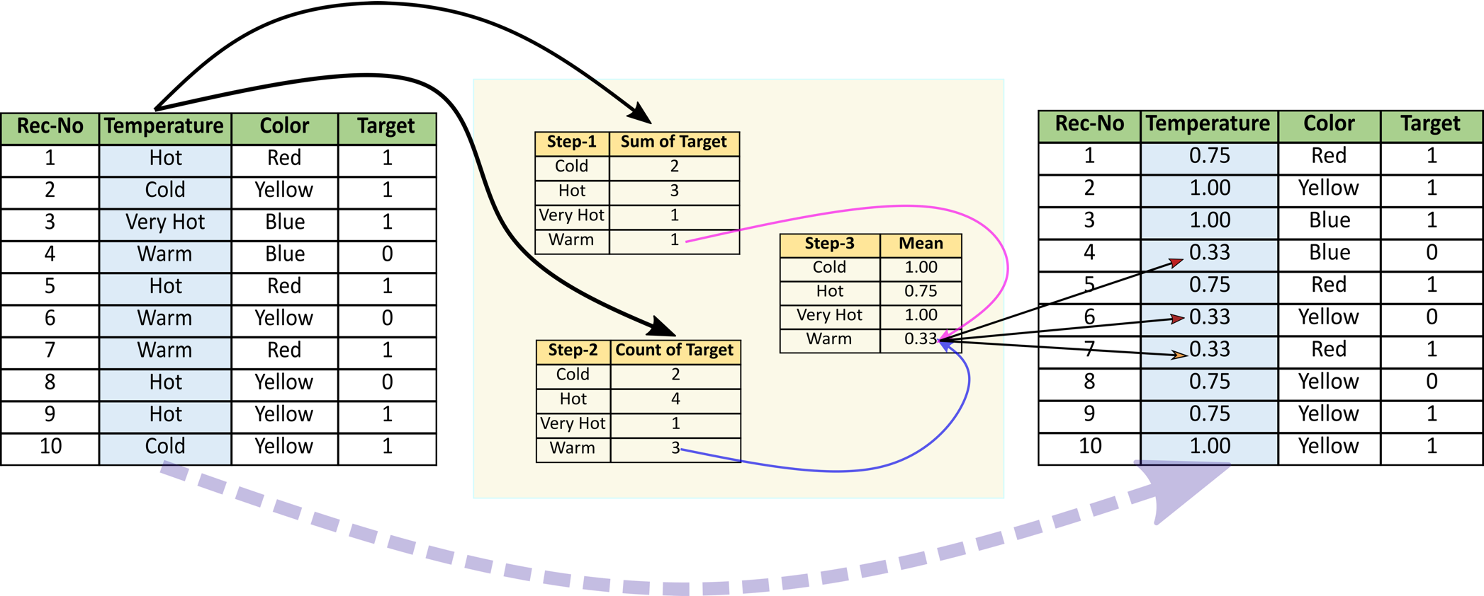

In [ ]:
mean_enc = pd.concat([train_x, train_y], axis=1).groupby('Metro station')['Price'].mean()
train_x['metro_m_enc'] = train_x['Metro station'].map(mean_enc)
train_x.head()

,Metro station,Minutes to metro,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors,Apartment type_New building,Apartment type_Secondary,Region_Moscow,Region_Moscow region,Renovation_Cosmetic,Renovation_Designer,Renovation_European-style renovation,Renovation_Without renovation,metro_m_enc
13300,Красногвардейская,5.00,3,83.00,44.10,13.50,11,20,True,False,False,True,True,False,False,False,"6,176,099.56"
11436,Преображенская площадь,12.00,0,31.50,18.10,9.20,4,4,False,True,True,False,False,False,True,False,"15,095,256.31"
7228,Охотный ряд,5.00,2,66.00,37.00,8.00,3,8,False,True,True,False,False,False,True,False,"297,496,094.82"
9239,Нагорная,14.00,3,71.70,52.40,8.10,4,5,False,True,True,False,False,False,True,False,"18,245,238.10"
10381,Кропоткинская,11.00,4,235.00,170.00,35.00,5,8,False,True,True,False,False,True,False,False,"243,001,725.12"


In [ ]:
test_x['metro_m_enc'] = test_x['Metro station'].map(mean_enc).fillna(train_y.median())

In [ ]:
# Оригинальная колонка 'Metro station' нам больше не нужна, удалим ее
train_x = train_x.drop(['Metro station'], axis=1)
test_x = test_x.drop(['Metro station'], axis=1)

In [ ]:
# Обучим регрессию
lr4 = LinearRegression()
lr4.fit(train_x, train_y)
pred_test = lr4.predict(test_x)
print(f'RMSE: {round(root_mean_squared_error(test_y, pred_test), 5)}')
print(f'MAE: {round(mean_absolute_error(test_y, pred_test), 5)}')
print(f'R2: {round(r2_score(test_y, pred_test), 5)}')

RMSE: 44457171.9372
MAE: 17662795.38051
R2: 0.69628


## Pipeline
В библиотеке sklearn есть возможность оптимизировать управление последовательностью шагов обработки данных и построения модели с помощью ```Pipeline```

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
# Составим простейший пайплайн, включающий этап стандартизации и обсучения модели
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())])

In [ ]:
pipeline.fit(train_x, train_y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

In [ ]:
# Результат
pred_test = pipeline.predict(test_x)
root_mean_squared_error(test_y, pred_test)
print(f'RMSE: {round(root_mean_squared_error(test_y, pred_test), 5)}')
print(f'MAE: {round(mean_absolute_error(test_y, pred_test), 5)}')
print(f'R2: {round(r2_score(test_y, pred_test), 5)}')

RMSE: 44457171.94035
MAE: 17662795.38345
R2: 0.69628


Перед тем как обучить финальный вариант модели, посмотрим еще раз на целевую переменную и неножко ее обработаем.

<Axes: >

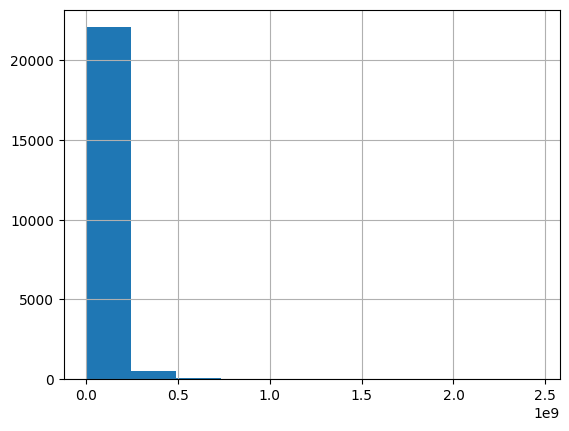

In [ ]:
df['Price'].hist()

In [ ]:
df['Log_price'] = np.log(df['Price'])

<Axes: >

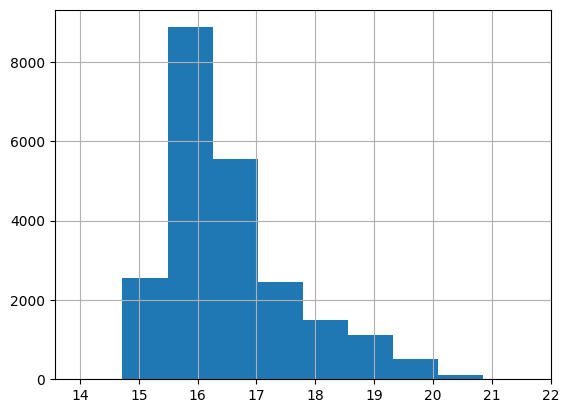

In [ ]:
df['Log_price'].hist()

**Вопрос**: Зачем мы логарифмировали целевую переменную и можно ли ее было оставить как есть?

In [ ]:
# df['Floor_2_x'] = df['Floor']**2

In [ ]:
# Если внимательно посмотрим на колонку 'Metro station', можем увидеть, в некоторых названиях есть лишние пробелы. Исправим это ниже
df[df['Metro station'].str.contains('виамоторная')]['Metro station'].unique()

array([' Авиамоторная', 'Авиамоторная'], dtype=object)

## Подготовка данных к финальному обучению

Можно просто прописать подряд все подготовительные действия для полученния финальных выборок

In [ ]:
df_with_cat = pd.get_dummies(df, columns =['Apartment type', 'Region', 'Renovation'])
df_final = df_with_cat.copy()
X = df_final.drop(['Price', 'Log_price'], axis=1)
y = df_final['Log_price']
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.25, random_state=42)
mean_enc = pd.concat([train_x, train_y], axis=1).groupby('Metro station')['Log_price'].mean()
train_x['metro_m_enc'] = train_x['Metro station'].map(mean_enc)
df['Metro station'] = df['Metro station'].str.strip() # удаляем ненужные пробелы
test_x['metro_m_enc'] = test_x['Metro station'].map(mean_enc).fillna(train_y.median())
train_x = train_x.drop(['Metro station'], axis=1)
test_x = test_x.drop(['Metro station'], axis=1)

А можно обернуть все подготовительные действия в отдельные функции

In [ ]:
def clean_data(df):
    df['Metro station'] = df['Metro station'].str.strip()
    return df

In [ ]:
def get_categorical(train_x, train_y):
    mean_enc = pd.concat([train_x, train_y], axis=1).groupby('Metro station')['Log_price'].mean()
    train_x['metro_m_enc'] = train_x['Metro station'].map(mean_enc).fillna(train_y.median())
    train_x = train_x.drop(['Metro station'], axis=1)
    return train_x

In [ ]:
def get_categorical_test(test_x, train_x, train_y):
    mean_enc = pd.concat([train_x, train_y], axis=1).groupby('Metro station')['Log_price'].mean()
    test_x['metro_m_enc'] = test_x['Metro station'].map(mean_enc).fillna(train_y.median())
    test_x = test_x.drop(['Metro station'], axis=1)
    return test_x

In [ ]:
def remove_outliers(data, y, col, is_target = False):
    column = data[col] if not is_target else y
    IQR = column.quantile(0.75) - column.quantile(0.25)
    h = column.quantile(0.75) + 1.5 * IQR
    l =column.quantile(0.25) - 1.5 * IQR
    return data[column.between(l, h)], y[column.between(l, h)]

Применим преобразования к датасету

In [ ]:
df_with_cat = pd.get_dummies(df, columns =['Apartment type', 'Region', 'Renovation'])
df_final = df_with_cat.copy()
X = df_final.drop(['Price', 'Log_price'], axis=1)
y = df_final['Log_price']
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.25, random_state=42)
train_x_final = train_x.pipe(clean_data) \
            .pipe(get_categorical, train_y=train_y)
test_x_final = test_x.pipe(clean_data) \
            .pipe(get_categorical_test, train_x=train_x, train_y=train_y)

In [ ]:
train_x_without_outliers, train_y_without_outliers = remove_outliers(train_x_final, train_y, col, is_target = True)

In [ ]:
train_x_final.shape, train_x_without_outliers.shape

((17007, 16), (16132, 16))

Зададим пайплайн

In [ ]:
pipeline_final = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

И последний раз на сегодня обучим модель

In [ ]:
pipeline_final.fit(train_x_without_outliers,  train_y_without_outliers)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

## Финальные результаты

In [ ]:
pred_test = pipeline_final.predict(test_x_final)
root_mean_squared_error(np.exp(test_y),np.exp(pred_test))

1676431355.9687417

In [ ]:
print(f'RMSE: {round(root_mean_squared_error(test_y, pred_test), 5)}')
print(f'MAE: {round(mean_absolute_error(test_y, pred_test), 5)}')
print(f'R2: {round(r2_score(test_y, pred_test), 5)}')

RMSE: 0.35152
MAE: 0.21795
R2: 0.8985
